In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(123)

# Series

- types
- index
- values
- string methods
- cat methods
- datetime methods

### Numeric

In [4]:
s1 = pd.Series(np.random.randint(0, 10, 5), name='n')

In [5]:
s1

0    2
1    2
2    6
3    1
4    3
Name: n, dtype: int32

In [6]:
s1.shape

(5,)

In [7]:
s1.index

RangeIndex(start=0, stop=5, step=1)

In [8]:
s1.values

array([2, 2, 6, 1, 3])

In [9]:
s1[1:4]

1    2
2    6
3    1
Name: n, dtype: int32

In [10]:
s1 *= 2

In [11]:
s1

0     4
1     4
2    12
3     2
4     6
Name: n, dtype: int32

## Strings

In [12]:
s2 = pd.Series(['duke-bugsy-math', 'duke-flopsy-stats', 'unc-scooby-lit', 'unc-scooby-stats'], name='rhyme')

In [13]:
s2

0      duke-bugsy-math
1    duke-flopsy-stats
2       unc-scooby-lit
3     unc-scooby-stats
Name: rhyme, dtype: object

In [14]:
s2.str.split('-', expand=True)

,0,1,2
0,duke,bugsy,math
1,duke,flopsy,stats
2,unc,scooby,lit
3,unc,scooby,stats


In [15]:
s2.str.split('-').str[1]

0     bugsy
1    flopsy
2    scooby
3    scooby
Name: rhyme, dtype: object

### Categories (aka "factors")

In [16]:
s3 = pd.Series(['first', 'second', 'third', 'fourth', 'first', 'third'])

In [17]:
s3 = s3.astype('category')

In [18]:
s3

0     first
1    second
2     third
3    fourth
4     first
5     third
dtype: category
Categories (4, object): ['first', 'fourth', 'second', 'third']

In [19]:
s3 = s3.cat.set_categories(['first', 'second', 'third', 'fourth', 'fifth'], ordered=True)

In [20]:
s3

0     first
1    second
2     third
3    fourth
4     first
5     third
dtype: category
Categories (5, object): ['first' < 'second' < 'third' < 'fourth' < 'fifth']

In [21]:
s3.sort_values()

0     first
4     first
1    second
2     third
5     third
3    fourth
dtype: category
Categories (5, object): ['first' < 'second' < 'third' < 'fourth' < 'fifth']

In [22]:
s3.cat.codes

0    0
1    1
2    2
3    3
4    0
5    2
dtype: int8

In [23]:
s3.cat.categories

Index(['first', 'second', 'third', 'fourth', 'fifth'], dtype='object')

In [24]:
s3 = s3.cat.remove_unused_categories()

In [25]:
s3

0     first
1    second
2     third
3    fourth
4     first
5     third
dtype: category
Categories (4, object): ['first' < 'second' < 'third' < 'fourth']

### With datetime index

In [26]:
n = 10
ts = pd.date_range('today', periods=n, freq='D')

In [27]:
ts

DatetimeIndex(['2021-10-20 18:53:05.013830', '2021-10-21 18:53:05.013830',
               '2021-10-22 18:53:05.013830', '2021-10-23 18:53:05.013830',
               '2021-10-24 18:53:05.013830', '2021-10-25 18:53:05.013830',
               '2021-10-26 18:53:05.013830', '2021-10-27 18:53:05.013830',
               '2021-10-28 18:53:05.013830', '2021-10-29 18:53:05.013830'],
              dtype='datetime64[ns]', freq='D')

In [28]:
s4 = pd.Series(np.random.randn(n), index=ts)

In [29]:
s4

2021-10-20 18:53:05.013830    1.521361
2021-10-21 18:53:05.013830   -0.048250
2021-10-22 18:53:05.013830    1.595301
2021-10-23 18:53:05.013830   -1.783094
2021-10-24 18:53:05.013830   -0.286451
2021-10-25 18:53:05.013830   -1.041969
2021-10-26 18:53:05.013830   -1.479645
2021-10-27 18:53:05.013830    1.071282
2021-10-28 18:53:05.013830    0.807485
2021-10-29 18:53:05.013830   -1.058267
Freq: D, dtype: float64

In [30]:
s4.index.day_name()

Index(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object')

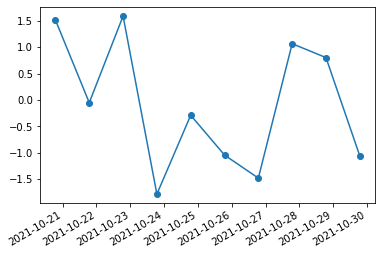

In [31]:
s4.plot(style='-o')
pass

### With datetime values

In [32]:
s5 = pd.Series(pd.date_range('today', periods=n, freq='23H'), name='visits')

In [33]:
s5

0   2021-10-20 18:53:05.700406
1   2021-10-21 17:53:05.700406
2   2021-10-22 16:53:05.700406
3   2021-10-23 15:53:05.700406
4   2021-10-24 14:53:05.700406
5   2021-10-25 13:53:05.700406
6   2021-10-26 12:53:05.700406
7   2021-10-27 11:53:05.700406
8   2021-10-28 10:53:05.700406
9   2021-10-29 09:53:05.700406
Name: visits, dtype: datetime64[ns]

In [34]:
s5.dt.hour

0    18
1    17
2    16
3    15
4    14
5    13
6    12
7    11
8    10
9     9
Name: visits, dtype: int64

In [35]:
s5.dt.day_name()

0    Wednesday
1     Thursday
2       Friday
3     Saturday
4       Sunday
5       Monday
6      Tuesday
7    Wednesday
8     Thursday
9       Friday
Name: visits, dtype: object

## Data Frames

In [36]:
df = pd.read_csv('https://bit.ly/2RIw7Ig', index_col=0)

### Basic operations

#### Inspection

In [37]:
df.columns

Index(['sex', 'weight', 'height', 'repwt', 'repht'], dtype='object')

In [38]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', length=200)

In [39]:
df.head(3)

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0


In [40]:
df.tail(3)

,sex,weight,height,repwt,repht
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0
200,M,79,177,81.0,178.0


In [41]:
df.sample(3)

,sex,weight,height,repwt,repht
189,M,76,183,75.0,180.0
58,M,73,183,74.0,180.0
72,M,66,173,66.0,175.0


In [42]:
df.shape

(200, 5)

In [43]:
df.dtypes

sex        object
weight      int64
height      int64
repwt     float64
repht     float64
dtype: object

In [44]:
df.describe()

,weight,height,repwt,repht
count,200.000000,200.000000,183.000000,183.000000
mean,65.800000,170.020000,65.622951,168.497268
std,15.095009,12.007937,13.776669,9.467048
min,39.000000,57.000000,41.000000,148.000000
25%,55.000000,164.000000,55.000000,160.500000
50%,63.000000,169.500000,63.000000,168.000000
75%,74.000000,177.250000,73.500000,175.000000
max,166.000000,197.000000,124.000000,200.000000


#### Indexing

In [45]:
df.weight.head(3)

1    77
2    58
3    53
Name: weight, dtype: int64

In [46]:
df['weight'].head(3)

1    77
2    58
3    53
Name: weight, dtype: int64

In [47]:
df[['weight', 'height']].head(3)

,weight,height
1,77,182
2,58,161
3,53,161


In [48]:
df[1:3]

,sex,weight,height,repwt,repht
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0


In [49]:
df.iloc[1:3, 1:4]

,weight,height,repwt
2,58,161,51.0
3,53,161,54.0


In [50]:
df.loc[[1,4,7], ['weight', 'height']]

,weight,height
1,77,182
4,68,177
7,76,167


In [51]:
df.iloc[1:3]

,sex,weight,height,repwt,repht
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0


In [52]:
df.loc[1:3]

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0


### `dplyr` type operations

#### Select columns

In [53]:
df.filter(regex=r'^r', axis=1).head(3)

,repwt,repht
1,77.0,180.0
2,51.0,159.0
3,54.0,158.0


In [54]:
df.loc[1:3, df.columns.str.startswith('r')]

,repwt,repht
1,77.0,180.0
2,51.0,159.0
3,54.0,158.0


In [55]:
cols = [c for c in df.columns if c.startswith('r')]
df[cols].head(3)

,repwt,repht
1,77.0,180.0
2,51.0,159.0
3,54.0,158.0


#### Filter rows

In [56]:
df.loc[df.repwt > df.weight].head(3)

,sex,weight,height,repwt,repht
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
7,M,76,167,77.0,165.0


#### Arrange values

In [57]:
df.sort_values(['weight', 'height'], ascending=[False, False]).head(3)

,sex,weight,height,repwt,repht
12,F,166,57,56.0,163.0
21,M,119,180,124.0,178.0
97,M,103,185,101.0,182.0


In [58]:
df.nlargest(3, ['weight', 'height'])

,sex,weight,height,repwt,repht
12,F,166,57,56.0,163.0
21,M,119,180,124.0,178.0
97,M,103,185,101.0,182.0


#### Mutate values

In [59]:
df.assign(bmi = lambda x: x.weight/((x.height/100)**2)).head(3)

,sex,weight,height,repwt,repht,bmi
1,M,77,182,77.0,180.0,23.245985
2,F,58,161,51.0,159.0,22.375680
3,F,53,161,54.0,158.0,20.446742


In [60]:
df['bmi'] = df['weight']/((df['height']/100)**2)

In [61]:
df.head(3)

,sex,weight,height,repwt,repht,bmi
1,M,77,182,77.0,180.0,23.245985
2,F,58,161,51.0,159.0,22.375680
3,F,53,161,54.0,158.0,20.446742


#### Summarize

In [62]:
df.mean()

C:\Users\petri\AppData\Local\Temp/ipykernel_8696/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


weight     65.800000
height    170.020000
repwt      65.622951
repht     168.497268
bmi        24.700956
dtype: float64

In [63]:
df.median()

C:\Users\petri\AppData\Local\Temp/ipykernel_8696/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


weight     63.000000
height    169.500000
repwt      63.000000
repht     168.000000
bmi        21.837154
dtype: float64

#### Groupby

In [64]:
df.groupby('sex').mean()

,weight,height,repwt,repht,bmi
sex,,,,,
F,57.866071,163.741071,56.742574,162.198020,25.331053
M,75.897727,178.011364,76.560976,176.256098,23.899014


In [65]:
df.groupby('sex')[['weight', 'height']].mean()

,weight,height
sex,,
F,57.866071,163.741071
M,75.897727,178.011364


In [66]:
df.groupby('sex')[['weight', 'height']].agg(['mean', 'std'])

weight                 height           
          mean        std        mean        std
sex                                             
F    57.866071  12.383144  163.741071  11.643925
M    75.897727  11.890342  178.011364   6.440701

In [67]:
df.groupby('sex').agg({'weight': ['min', 'max'], 'height': ['mean', 'std']})

weight           height           
       min  max        mean        std
sex                                   
F       39  166  163.741071  11.643925
M       54  119  178.011364   6.440701

### `tidyr` type operations

In [68]:
df = pd.DataFrame(dict(name = ['clark kent', 'bruce wayne', 'diana prince'],
                       visit1 = [23,34,45],
                       visit2 = [25, 40, 54])
                 )

In [69]:
df

,name,visit1,visit2
0,clark kent,23,25
1,bruce wayne,34,40
2,diana prince,45,54


#### Gather

In [70]:
df_tall = pd.melt(df, id_vars='name')

In [71]:
df_tall

,name,variable,value
0,clark kent,visit1,23
1,bruce wayne,visit1,34
2,diana prince,visit1,45
3,clark kent,visit2,25
4,bruce wayne,visit2,40
5,diana prince,visit2,54


#### Spread

In [72]:
df_tall.pivot(index='name', columns='variable', values='value')

variable,visit1,visit2
name,,
bruce wayne,34,40
clark kent,23,25
diana prince,45,54


#### Separate

In [73]:
df[['first', 'last']] = df.name.str.split(expand=True)

In [74]:
df.head()

,name,visit1,visit2,first,last
0,clark kent,23,25,clark,kent
1,bruce wayne,34,40,bruce,wayne
2,diana prince,45,54,diana,prince


In [75]:
df = df.drop('name', axis=1)
df

,visit1,visit2,first,last
0,23,25,clark,kent
1,34,40,bruce,wayne
2,45,54,diana,prince


#### Join

In [76]:
df['name'] = df[['first', 'last']].apply(lambda x: ' '.join(x), axis=1)

In [77]:
df.head()

,visit1,visit2,first,last,name
0,23,25,clark,kent,clark kent
1,34,40,bruce,wayne,bruce wayne
2,45,54,diana,prince,diana prince


In [78]:
df = df.drop(['first', 'last'], axis=1)

In [79]:
df

,visit1,visit2,name
0,23,25,clark kent
1,34,40,bruce wayne
2,45,54,diana prince


#### Joins

In [80]:
df[['first', 'last']] = df.name.str.split(expand=True)

In [81]:
df1 = df.drop('name', axis=1)

In [82]:
df1

,visit1,visit2,first,last
0,23,25,clark,kent
1,34,40,bruce,wayne
2,45,54,diana,prince


In [83]:
df2 = df1.copy()
df2 = df2.rename({'visit1': 'visit3', 'visit2': 'visit4'}, axis=1)
df2 = df2.drop(0, axis=0)
df2.iloc[:, :2] *= 2
df2.loc[3] = [11, 23, 'arthur',  'curry']
df2

,visit3,visit4,first,last
1,68,80,bruce,wayne
2,90,108,diana,prince
3,11,23,arthur,curry


In [84]:
pd.merge(df1, df2)

,visit1,visit2,first,last,visit3,visit4
0,34,40,bruce,wayne,68,80
1,45,54,diana,prince,90,108


In [85]:
pd.merge(df1, df2, on=['first', 'last'])

,visit1,visit2,first,last,visit3,visit4
0,34,40,bruce,wayne,68,80
1,45,54,diana,prince,90,108


In [86]:
pd.merge(df1, df2, left_on=['first', 'last'], right_on=['first', 'last'])

,visit1,visit2,first,last,visit3,visit4
0,34,40,bruce,wayne,68,80
1,45,54,diana,prince,90,108


In [87]:
pd.merge(df1, df2, on=['first', 'last'], how='left')

,visit1,visit2,first,last,visit3,visit4
0,23,25,clark,kent,NaN,NaN
1,34,40,bruce,wayne,68.0,80.0
2,45,54,diana,prince,90.0,108.0


In [88]:
pd.merge(df1, df2, on=['first', 'last'], how='right')

,visit1,visit2,first,last,visit3,visit4
0,34.0,40.0,bruce,wayne,68,80
1,45.0,54.0,diana,prince,90,108
2,NaN,NaN,arthur,curry,11,23


In [89]:
pd.merge(df1, df2, on=['first', 'last'], how='outer')

,visit1,visit2,first,last,visit3,visit4
0,23.0,25.0,clark,kent,NaN,NaN
1,34.0,40.0,bruce,wayne,68.0,80.0
2,45.0,54.0,diana,prince,90.0,108.0
3,NaN,NaN,arthur,curry,11.0,23.0


In [90]:
df1.append(df1)

,visit1,visit2,first,last
0,23,25,clark,kent
1,34,40,bruce,wayne
2,45,54,diana,prince
0,23,25,clark,kent
1,34,40,bruce,wayne
2,45,54,diana,prince


In [91]:
df1.append(df2, sort=False)

,visit1,visit2,first,last,visit3,visit4
0,23.0,25.0,clark,kent,NaN,NaN
1,34.0,40.0,bruce,wayne,NaN,NaN
2,45.0,54.0,diana,prince,NaN,NaN
1,NaN,NaN,bruce,wayne,68.0,80.0
2,NaN,NaN,diana,prince,90.0,108.0
3,NaN,NaN,arthur,curry,11.0,23.0


In [92]:
df3 = df1.append(df2, sort=False)

In [93]:
df3.reset_index(drop=True)

,visit1,visit2,first,last,visit3,visit4
0,23.0,25.0,clark,kent,NaN,NaN
1,34.0,40.0,bruce,wayne,NaN,NaN
2,45.0,54.0,diana,prince,NaN,NaN
3,NaN,NaN,bruce,wayne,68.0,80.0
4,NaN,NaN,diana,prince,90.0,108.0
5,NaN,NaN,arthur,curry,11.0,23.0


In [94]:
df4 = df1.set_index(['first', 'last'])
df4

,,visit1,visit2
first,last,,
clark,kent,23,25
bruce,wayne,34,40
diana,prince,45,54


In [95]:
df5 = df2.set_index(['first', 'last'])
df5

,,visit3,visit4
first,last,,
bruce,wayne,68,80
diana,prince,90,108
arthur,curry,11,23


In [96]:
df6 = df5.copy()
df6 = df6.rename({'visit3': 'visit5', 'visit4': 'visit6'}, axis=1)
df6 = df6 - 10
df6

,,visit5,visit6
first,last,,
bruce,wayne,58,70
diana,prince,80,98
arthur,curry,1,13


In [97]:
df4.join([df5, df6])

,,visit1,visit2,visit3,visit4,visit5,visit6
first,last,,,,,,
clark,kent,23.0,25.0,NaN,NaN,NaN,NaN
bruce,wayne,34.0,40.0,68.0,80.0,58.0,70.0
diana,prince,45.0,54.0,90.0,108.0,80.0,98.0


In [98]:
df4.join([df5, df6], how='outer')

,,visit1,visit2,visit3,visit4,visit5,visit6
first,last,,,,,,
arthur,curry,NaN,NaN,11.0,23.0,1.0,13.0
bruce,wayne,34.0,40.0,68.0,80.0,58.0,70.0
clark,kent,23.0,25.0,NaN,NaN,NaN,NaN
diana,prince,45.0,54.0,90.0,108.0,80.0,98.0
